# An Interactive Visualization Inspired by Ferreira et al. (2014)

---


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))

In [1]:
import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import cm
from matplotlib.colors import ListedColormap

%matplotlib notebook

<IPython.core.display.Javascript object>


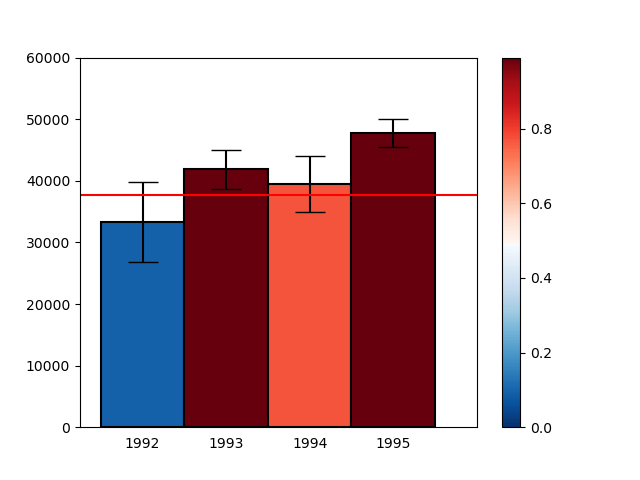

7

In [3]:
# initialize figure and hline value
fig = plt.figure()
yvalue = np.mean(np.mean(df, axis = 1))

# create colormap
bottom = cm.get_cmap('Reds', 128)
top = cm.get_cmap('Blues_r', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='RedBlue')

# get and plot the y-value to compare the sample means to
plt.axhline(y=yvalue, color='r', linestyle='-')

# get the colors of the bars by performing t-tests for difference in means
pvalues = [] 
tstats = [] 
colors = []
for i in range(df.shape[0]):
    pvalues.append(stats.ttest_1samp(df.iloc[i], yvalue).pvalue)
    tstats.append(stats.ttest_1samp(df.iloc[i], yvalue).statistic)
    # map the pvalues onto the colormap for "below" and "above"
    if tstats[i] > 0:
        colors.append(newcmp.colors[min([int(round((1 - (pvalues[i] / 2))*256)), 255])])
    else:
        colors.append(newcmp.colors[min([int(round((pvalues[i] / 2)*256)), 255])])
        
# plot the bar chart
bars = plt.bar(df.index,
               np.mean(df, axis = 1),
               width=1.0,
               color=colors,
               edgecolor='black',
               align='center',
               linewidth=1.5,
               yerr=np.std(df, axis=1)*1.96/np.sqrt(df.shape[1]),
               capsize=11,
              )
ax = fig.gca()
ax.axis([1991.25,1996,0,60000])
plt.xticks(df.index)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off

# show colormap
plt.imshow(np.outer(np.arange(0,1,0.01),np.ones(10)), aspect='auto',cmap=newcmp,origin="lower")
plt.colorbar()
plt.show()

# interactively set y-value for comparison
def onclick(event):
    yvalue = event.ydata
    plt.cla()
    
    # get and plot the y-value to compare the sample means to
    plt.axhline(y=yvalue, color='r', linestyle='-')
    
    # get the colors of the bars by performing t-tests for difference in means
    pvalues = [] 
    tstats = [] 
    colors = []
    for i in range(df.shape[0]):
        pvalues.append(stats.ttest_1samp(df.iloc[i], yvalue).pvalue)
        tstats.append(stats.ttest_1samp(df.iloc[i], yvalue).statistic)
        # map the pvalues onto the colormap for "below" and "above"
        if tstats[i] > 0:
            colors.append(newcmp.colors[min([int(round((1 - (pvalues[i] / 2))*256)), 255])])
        else:
            colors.append(newcmp.colors[min([int(round((pvalues[i] / 2)*256)), 255])])

    # plot the bar chart
    bars = plt.bar(df.index,
                   np.mean(df, axis = 1),
                   width=1.0,
                   color=colors,
                   edgecolor='black',
                   align='center',
                   linewidth=1.5,
                   yerr=np.std(df, axis=1)*1.96/np.sqrt(df.shape[1]),
                   capsize=11,
                  )
    ax = plt.gca()
    ax.axis([1991.25,1996,0,60000])
    plt.xticks(df.index)
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=True) # labels along the bottom edge are off

# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

